In [30]:
%matplotlib inline

In [31]:

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math


In [32]:
def get_distance(p1, p2):
    return( math.sqrt( ((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2) ) )

def get_all_points(path_to_map):
    print("\n\nbe sure to path to the black and white map here, and if it doesnt work try some combination of / and .. or none at all")
    #find lake image file
    blobs = cv.imread(cv.samples.findFile(path_to_map),0)

    #convert data from int to np bool 
    blobs = blobs > 127 
    #blobs is now a (540,960) 2 D array

    print(blobs.shape)

    ydim = blobs.shape[0] #num rows 540
    xdim = blobs.shape[1] #num columns 960

    sum_points = 0 #total number of points
    list_of_pixels =[]

    for row in range(0,ydim): #iterate through rows 
        for col in range(0,xdim): #iterate through columns
            if blobs[row][col] == True: #if pixel is skeleton add 1 to length of skeleton
                sum_points +=1
                list_of_pixels.append([col,row]) #[x,y]
                
    if sum_points == len(list_of_pixels):
        print("no errors detected\n\n")
    else:
        print ("f#&!\n\n")
    return list_of_pixels , xdim , ydim


In [50]:
def locate_nodes(path_to_image):
#read 3D rbg image as 2D greyscale nparray
    print("\n\nbe sure you are pathing to a skeleton for locate_nodes")
    blobs = cv.imread(cv.samples.findFile("../Lake_Murray_Map_Skeletons/SE_corner_skeleton.png"),0) 
    # last parameter 0 = greyscale 1 = color -1 = unchanged 

    #convert data from int to np bool 
    blobs = blobs > 127 
    #blobs is now a (540,960) 2 D array

    print("(ydim , xdim) == ",blobs.shape)

    ydim = blobs.shape[0] #num rows 540
    xdim = blobs.shape[1] #num columns 960


    # measure some skeleton metrics down here 
    sum_local_neighbors = 0 #number of adjacent skeleton pixels 
    sum_num_nodes = 0 #total number pixels that are of nodes of the skeleton
    sum_num_edges = 0 #total number pixels that are of edges ots 
    sum_num_endpoints = 0 #total number of pixels that are end points of the skeleton
    sum_num_islands = 0 #total number of pixels that are isolated
    sum_points_length = 0 #total number of skeleton pixels aka length of skeleton

    total_num_edgelines = 0 #how many actual edges are there in the network

    #lets make a bunch of arrays storing : node locations, endpoint locations, edge locations,island locations  
    node_locations = []
    edge_locations = []
    endpoint_locations = []
    island_locations = []

    total_skeleton = []
    #here we are going to find the nodes and edges and endpoints

    for row in range(0,ydim): #iterate through rows 
        for col in range(0,xdim): #iterate through columns
            
            if blobs[row][col] == True: #if pixel is skeleton add 1 to length of skeleton
                sum_points_length +=1
                
                #find the sum of the local neighbors included in the skeleton (including self): 1 = solo ,2= endpoint, 3 = edge , 4+ = node 
                for i in range(-1,2):
                    for j in range(-1,2):
                        try: #this because there may be points on the edge of the picture
                            sum_local_neighbors += int(blobs[row +i][col +j])
                        except:
                            pass
                
                #HEY JUST SO YOU KNOW: here I switch formats from (y,x) to (x,y) just to make things more confusing 
                 
                #figure out num nodes endpoints and edges
                if sum_local_neighbors >= 4: #if node
                    node_locations.append([col,row])
                    sum_num_nodes += 1
                    total_num_edgelines += sum_local_neighbors -1 #count connection points (-1 to remove self counting)
                elif sum_local_neighbors == 3: # if edge
                    edge_locations.append([col,row])
                    sum_num_edges += 1
                elif sum_local_neighbors == 2: # if endpoint
                    endpoint_locations.append([col,row])
                    sum_num_endpoints += 1
                    total_num_edgelines += sum_local_neighbors -1 #count connection points (-1 to remove self counting)
                else: #if island 
                    island_locations.append([col,row])
                    print("isolated point at (x,y)", col, row)
                    sum_num_islands +=1
                total_skeleton.append([col,row])
                #reset counter     
                sum_local_neighbors = 0

    #error check
    if sum_num_nodes + sum_num_edges + sum_num_endpoints + sum_num_islands == sum_points_length & len(total_skeleton) == sum_points_length:
        print("No errors detected")
    else:
        print("f*&!")

    total_num_edgelines = total_num_edgelines / 2 #because each edge has two endpoints 
    print("this skeleton has {0} edge lines, {1} nodes, {2} endpoints, and {3} islands. \nthe skeleton is of length {4} pixels.".format(total_num_edgelines , sum_num_nodes, sum_num_endpoints, sum_num_islands, sum_points_length))

    print("the edgelines are of average length {0}, .".format( sum_num_edges / total_num_edgelines))

    print("this function returns total_skeleton, nodes, edges, endpoints, and island's locations in (x,y) coordinate form\n\n")
    return total_skeleton,node_locations,edge_locations,edge_locations,island_locations

In [51]:
path1 = "../Lake_Murray_Map_Originals/SouthEastCorner_BW.jpg"
list_of_pixels , xdim , ydim = get_all_points(path1)

path2 = "../Lake_Murray_Map_Skeletons/SE_corner_thinned.png"
total_skeleton,node_locations,edge_locations,edge_locations,island_locations = locate_nodes(path2)

print(len(list_of_pixels))
print(len(total_skeleton))
#print(list_of_pixels)
list_of_pixels2 = list_of_pixels[::10]
#print(list_of_pixels2)



be sure to path to the black and white map here, and if it doesnt work try some combination of / and .. or none at all
(403, 341)
no errors detected




be sure you are pathing to a skeleton for locate_nodes
(ydim , xdim) ==  (403, 341)
No errors detected
this skeleton has 361.0 edge lines, 214 nodes, 55 endpoints, and 0 islands. 
the skeleton is of length 2751 pixels.
the edgelines are of average length 6.875346260387811, .
this function returns total_skeleton, nodes, edges, endpoints, and island's locations in (x,y) coordinate form


82292
2751


In [52]:

# try implementing using numpy and checking against the skeleton rather than every point around you 

distances_list = np.array([]) #empty distance ARRAY .... for now ;)
list_of_pixels = np.array(list_of_pixels)
total_skeleton = np.array(total_skeleton)

for point1 in list_of_pixels2:
    min_distance = xdim*ydim #this is just the default distance, should be absurdly large 
    for point2 in total_skeleton:
        dist = np.linalg.norm(point1 - point2)
        if dist < min_distance:
            min_distance = dist
            #print("1")




    distances_list = np.append(distances_list, min_distance)






In [53]:
print(distances_list)
x,y = zip(*list_of_pixels2)
#print(x)

[1.         5.65685425 9.21954446 ... 1.         0.         1.41421356]


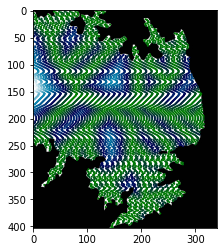

In [54]:
img = cv.imread(cv.samples.findFile("../Lake_Murray_Map_Originals/SouthEastCorner_BW.jpg"),0)
#plt.rcParams["figure.figsize"] = (20,3)

implot = plt.imshow(img,'gray')

plt.scatter(x, y, c=distances_list, cmap = plt.cm.ocean,s=1)

plt.savefig('heatmap.png')



In [55]:

# here is where the real magic happens:

max_distance = np.max(distances_list)

mean_distance = np.mean(distances_list)

print("The max distance from a sampled point is {} and the mean distance is {} ".format(max_distance,mean_distance))

coverage_per_length = mean_distance / len(total_skeleton)

print("The length of the skeleton is {}, and the mean distance per length is {}, perfect coverage would be 0.".format(len(total_skeleton),coverage_per_length))






The max distance from a sampled point is 62.22539674441618 and the mean distance is 11.244936025220479 
The length of the skeleton is 2751, and the mean distance per length is 0.004087581252352046, perfect coverage would be 0.
